In [15]:
import numpy as np
from scipy import optimize

P_wood = lambda x: 10 + 31*x[0]**(-0.5) + 1.3*x[1]**(-0.2)
P_alum = lambda x: 5 + 15*x[1]**(-0.4) + 0.8*x[0]**(-0.08)

# Function to optimize:
#   * x[0] = x = number of wooden chairs sold
#   * x[1] = y = number of aluminum chairs sold
profit = lambda x: x[0]*P_wood(x)-18*x[0]+x[1]*P_alum(x)-10*x[1]

# We want to maximize the profit, but python naturally minimizes functions, so define a new function that does the following
#  * - profit => so minimizing the new function is equivalent to maximizing the original profit function
#  * (optional) adds a large penalty when the variables x and y are negative 
profit_pen = lambda x: -profit(x) #+ 1000*((x[0]<0) + (x[1]<0))

# Initial guess
x0=[5,5]

# Optimize the problem using the function fmin
minimum = optimize.fmin(profit_pen, x0)

Optimization terminated successfully.
         Current function value: -52.072692
         Iterations: 35
         Function evaluations: 68


/tmp/ipykernel_678/136344533.py:4: RuntimeWarning: divide by zero encountered in power
  P_wood = lambda x: 10 + 31*x[0]**(-0.5) + 1.3*x[1]**(-0.2)
/tmp/ipykernel_678/136344533.py:10: RuntimeWarning: invalid value encountered in multiply
  profit = lambda x: x[0]*P_wood(x)-18*x[0]+x[1]*P_alum(x)-10*x[1]
/tmp/ipykernel_678/136344533.py:5: RuntimeWarning: divide by zero encountered in power
  P_alum = lambda x: 5 + 15*x[1]**(-0.4) + 0.8*x[0]**(-0.08)


Maximum profit for  4.689577973016851  wooden chairs and  5.852031046491972  aluminum chairs
Profit =  52.072691798595706


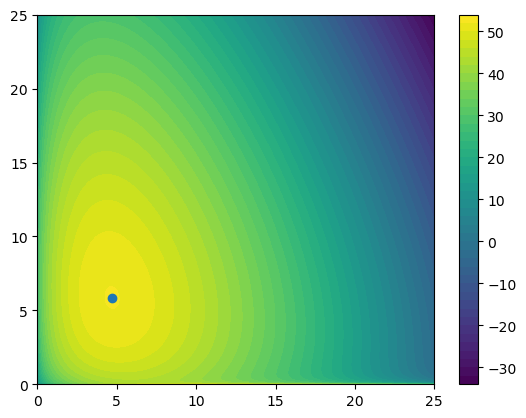

In [17]:
# Let us now sketch the graph of the function (the level sets) and its optimum

import matplotlib.pyplot as plt

# Graph in [0,25]x[0,25]
xmin = 0; xmax = 25;
ymin=0; ymax=25;
npts = 1001; nlevels=50;
# Create a grid in the correct form to graph using meshgrid
[X,Y] = np.meshgrid(np.linspace(xmin, xmax,npts),np.linspace(ymin,ymax,npts))

# Calculate the profit function at all values we are going to plot
Z = profit([X,Y])

plt.contourf(X,Y,Z, nlevels)
plt.colorbar()
plt.plot(minimum[0],minimum[1],'-o') # draw the optimal point

print("Maximum profit for ",minimum[0]," wooden chairs and ", minimum[1]," aluminum chairs")
print("Profit = ",profit(minimum))